In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
# 1. Path Dataset
train_dir = 'train'  # Folder untuk training
val_dir = 'val'      # Folder untuk validation
test_dir = 'test'    # Folder untuk testing

# 2. Hyperparameters
img_size = (224, 224)  # Ukuran gambar sesuai input ResNet101V2
batch_size = 32
epochs = 5
learning_rate = 0.0001


In [3]:
# 3. Data Preparation (Train, Validation, and Test)
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Data Train
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Data Validation
val_data = datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Data Test
test_data = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 69601 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.
Found 8701 images belonging to 29 classes.


In [4]:
# 4. Model ResNet101V2
base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Membekukan layer pretrained
for layer in base_model.layers:
    layer.trainable = False

# Menambahkan Layer Klasifikasi
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

# Compile Model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

171317808/171317808 [==============================] - 94s 1us/step


In [5]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    verbose=1
)

Epoch 1/5
2176/2176 [==============================] - 665s 301ms/step - loss: 0.6594 - accuracy: 0.8120 - val_loss: 0.0614 - val_accuracy: 0.9787
Epoch 2/5
2176/2176 [==============================] - 654s 301ms/step - loss: 0.2354 - accuracy: 0.9313 - val_loss: 0.0414 - val_accuracy: 0.9853
Epoch 3/5
2176/2176 [==============================] - 655s 301ms/step - loss: 0.1914 - accuracy: 0.9498 - val_loss: 0.0268 - val_accuracy: 0.9916
Epoch 4/5
2176/2176 [==============================] - 655s 301ms/step - loss: 0.1564 - accuracy: 0.9598 - val_loss: 0.0221 - val_accuracy: 0.9939
Epoch 5/5
2176/2176 [==============================] - 658s 302ms/step - loss: 0.1413 - accuracy: 0.9668 - val_loss: 0.0153 - val_accuracy: 0.9946


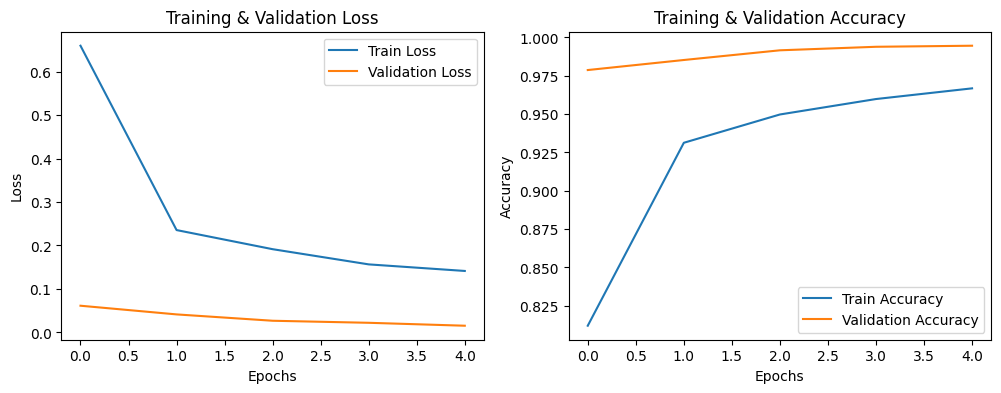

In [6]:
# 6. Evaluasi Model: Learning Curve
def plot_learning_curve(history):
    plt.figure(figsize=(12, 4))
    
    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

plot_learning_curve(history)

272/272 [==============================] - 72s 259ms/step


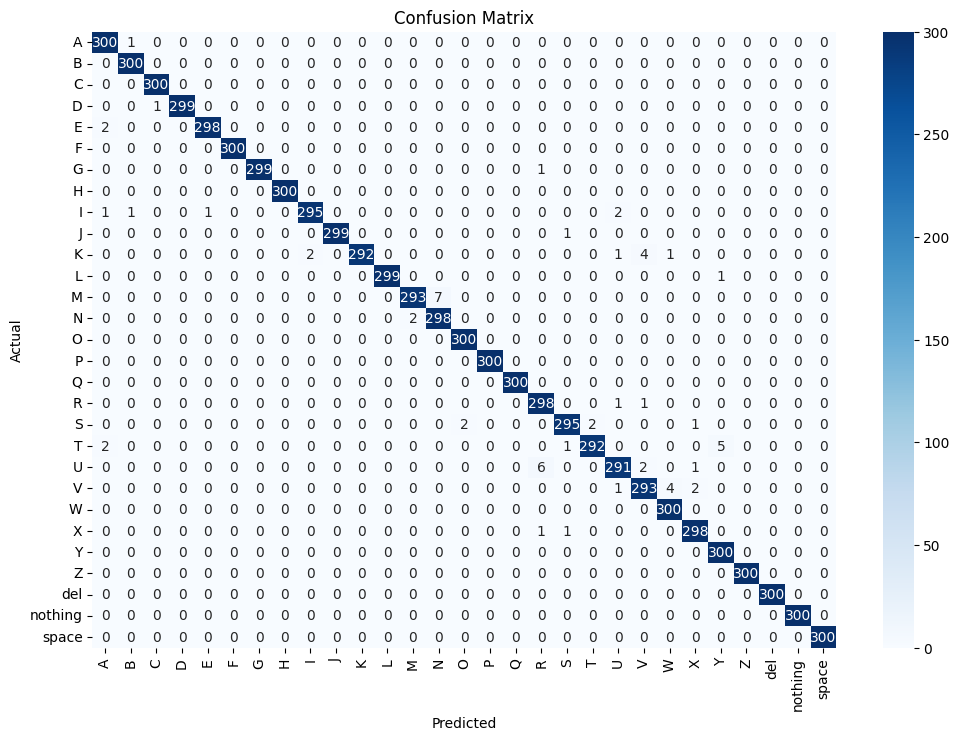

Classification Report:
              precision    recall  f1-score   support

           A       0.98      1.00      0.99       301
           B       0.99      1.00      1.00       300
           C       1.00      1.00      1.00       300
           D       1.00      1.00      1.00       300
           E       1.00      0.99      0.99       300
           F       1.00      1.00      1.00       300
           G       1.00      1.00      1.00       300
           H       1.00      1.00      1.00       300
           I       0.99      0.98      0.99       300
           J       1.00      1.00      1.00       300
           K       1.00      0.97      0.99       300
           L       1.00      1.00      1.00       300
           M       0.99      0.98      0.98       300
           N       0.98      0.99      0.99       300
           O       0.99      1.00      1.00       300
           P       1.00      1.00      1.00       300
           Q       1.00      1.00      1.00       300
    

In [7]:
# 7. Confusion Matrix & Classification Report
# Evaluasi pada Test Data
y_true = test_data.classes
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_data.class_indices.keys()))